### Solution_Homework_10

Note: Please also refer report.txt and image files relevant to this exercise.

In [6]:
import pandas as ps
import numpy as np
from matplotlib import pyplot as plt

# 1.1
data = ps.read_csv('imdb_top_10000.csv', sep='\t')
data = data.dropna()
print(data.shape[0])


9999


In [7]:
# 1.2
data['runtime'] = [int(r.split(' ')[0]) for r in data['runtime']]



In [8]:
# 1.3
# prepare the splits
sp = [r.split('|') for r in data['genres']]

# get unique genres
genres = np.unique(sum(sp, [])).tolist()

# create columns
for g in genres:
    data[g] = [g in s for s in sp]

# delete the column
del data['genres']

In [9]:
# 1.4
# print statistics
print(data[['runtime', 'score', 'votes', 'year']].describe())

# select rows with non zero runtime
data = data[data['runtime']>=0.1]

           runtime        score          votes         year
count  9999.000000  9999.000000    9999.000000  9999.000000
mean    103.580358     6.385989   16605.462946  1993.471447
std      26.629310     1.189965   34564.883945    14.830049
min       0.000000     1.500000    1356.000000  1950.000000
25%      93.000000     5.700000    2334.500000  1986.000000
50%     102.000000     6.600000    4981.000000  1998.000000
75%     115.000000     7.200000   15278.500000  2005.000000
max     450.000000     9.200000  619479.000000  2011.000000


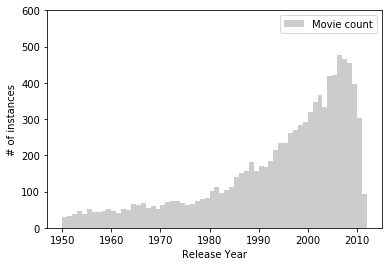

In [10]:
# 1.5
# plot a histogram of the movies per year
plt.hist(data['year'], bins=np.arange(1950, 2013), label=['Movie count'], color='#cccccc')
plt.legend()
plt.ylim([0, 600])
plt.xlabel('Release Year')
plt.ylabel('# of instances')
plt.savefig('1.5.png')


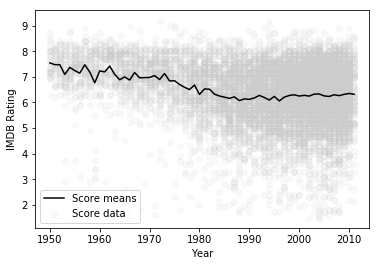

In [11]:
# 1.7
# obtain yearly means of scores
year_mean = data.groupby(data['year'])['score'].mean()

# produce the plot
plt.clf()
plt.scatter(data['year'], data['score'], alpha=0.1, color='#cccccc', label='Score data')
plt.plot(year_mean.index, year_mean.values, color='black', label='Score means')
plt.xlabel("Year")
plt.ylabel("IMDB Rating")
plt.legend()
plt.savefig('1.6.png')

In [12]:
# 1.8 lowest and highest rated movies:
print(data[data.score == data.score.min()][['title', 'score']])
print(data[data.score == data.score.max()][['title', 'score']])

                                    title  score
1982      Manos: The Hands of Fate (1966)    1.5
2793  Superbabies: Baby Geniuses 2 (2004)    1.5
3746             Daniel the Wizard (2004)    1.5
5158                  Ben & Arthur (2002)    1.5
5993     Night Train to Mundo Fine (1966)    1.5
6257               Monster a-Go Go (1965)    1.5
                              title  score
0   The Shawshank Redemption (1994)    9.2
26             The Godfather (1972)    9.2
